In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import random
from sklearn.decomposition import PCA
import pandas_profiling
from sklearn.covariance import EllipticEnvelope
import os
# dependencies

%matplotlib inline
# visualizations in Jupyter Notebooks

os.getcwd()
os.chdir('/Users/calgergen/Desktop/Homework/')
#working directory

In [2]:
lenddata = pd.read_csv("PMLendingClub.csv")
# reading the lending data in

cont = ["loan_amnt", "funded_amnt", "int_rate", "installment", "emp_length", "annual_inc", 
        "dti", "inq_last_6mths", "mths_since_last_deliq",
       "mths_since_last_record", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "total_pymnt",
       "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "last_pymnt_amnt", "tot_cur_bal",
       "total_rev_hi_lim", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "pct_tl_nvr_dlq",
       "percent_bc_gt_75", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit"]
# all numeric columns

# need to clean int_rate, emp_length, revol_util

In [3]:
print(lenddata.shape)

contdata = lenddata.loc[:, cont]
# selecting only continuous variables

# contdata.head
contdata.shape

# 13 variables less

(1722891, 44)


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(1722891, 31)

In [4]:
contdata['int_rate'] = contdata['int_rate'].str.strip('%').astype('float') / 100
# changing percentage to a float

contdata['emp_length'] = contdata['emp_length'].str.strip('+ years').str.strip('< ').astype('float')
# getting rid of years or 10+ years characters, and <1 year characters, allowing for just year number as float
# preserves NAs, do lose the 10+ or <1 year knowledge of it being more than 10 or less than 1, as now it is 
# simply 10 or 1 respectively

contdata['revol_util'] = contdata['revol_util'].str.strip('%').astype('float') / 100
# changing percentage to a float

# contdata.head

In [5]:
# Missing Values Check

missing = sum(contdata.isnull().values)
print(list(contdata))
cols = list(contdata)
print(missing)
print(contdata.shape)

missdf = pd.DataFrame()
missdf['cols'] = cols
missdf['missing'] = missing
missdf

['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_deliq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit']
[      0       0       0       0  103808       0     579       1 1722891
 1430370       0       0       0    1120       0       0       0       0
       0       0   27741   27741    7495   27771   25812   26733   27894
   26248   27741    7495    7495]
(1722891, 31)


,cols,missing
0,loan_amnt,0
1,funded_amnt,0
2,int_rate,0
3,installment,0
4,emp_length,103808
5,annual_inc,0
6,dti,579
7,inq_last_6mths,1
8,mths_since_last_deliq,1722891
9,mths_since_last_record,1430370


In [6]:
# Missing Values Care

contdataNAcontrol = contdata.loc[:, contdata.isnull().sum(axis = 0)<30000]
print(contdataNAcontrol.shape)
print(list(contdataNAcontrol))

contdatanoNA = contdataNAcontrol.dropna(axis = 0, how = 'any') # drop rows with any nas
print(contdatanoNA.shape)

# Lose about 50000 rows when using data with less than 30000

# Can also set threshold at 8000 missing values, keeps about 40000 more rows, but loses 8 more variables

# contdataNAcontrol2 = contdata.loc[:, contdata.isnull().sum(axis = 0)<8000]
# print(contdataNAcontrol2.shape)
# print(list(contdataNAcontrol2))

# contdatanoNA2 = contdataNAcontrol2.dropna(axis = 0, how = 'any') # drop rows with any nas
# print(contdatanoNA2.shape)

(1722891, 28)
['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit']
(1675043, 28)


In [7]:
# Standardizing our Data

scaler = StandardScaler()
contdatanoNAstd = scaler.fit_transform(contdatanoNA)
print(type(contdatanoNAstd)) # gives us an NDArray, perfect because this is what we need for PCA
print(contdatanoNAstd.shape) # same shape as before, yay
contdatanoNAstd.view() # looks ugly, because arrays are ugly

<class 'numpy.ndarray'>
(1675043, 28)


array([[-0.5531993 , -0.55319698, -0.74294542, ..., -0.65950231,
        -0.24244492, -0.60155561],
       [ 0.65942748,  0.65943106,  0.06873688, ..., -0.74548507,
        -0.56238666, -0.33858333],
       [-0.77775981, -0.77775773, -0.46537531, ..., -0.8006647 ,
        -0.71600769, -0.64689566],
       ...,
       [-0.5531993 , -0.55319698, -0.25509492, ...,  0.15042668,
        -0.29747   , -0.92800396],
       [ 0.18223639,  0.18223947,  1.73415754, ..., -0.70301341,
        -0.51569191, -0.13455311],
       [-0.32863878, -0.32863623,  1.73415754, ..., -0.32146701,
         0.29034893, -0.02120299]])

In [8]:
# Getting into that PCA work

pca = PCA(0.90) # amount of variance
pca.fit(contdatanoNAstd) # actually doing pca
print(pca.n_components_) # number of pca components

# 28 columns in our data

# 90 gives us 14 components, cuts it in half
# 95 gives us 17
# 99 gives us 22
# 85 gives us 12, doesn't explain enough variance though
# Really we only end up with 2 less components, and this doesn't seem worth the loss in variance

# 90 percent variance seems the ideal amount

14


In [9]:
pca_components = pca.transform(contdatanoNAstd)
print(pca_components.shape)
pca_components.view()
print(type(pca_components))

# our actual pca components dataset is now pca_components

(1675043, 14)
<class 'numpy.ndarray'>


In [10]:
# Attaching PCAs back to no NA continuous dataset

contdatanoNA["Index"] = contdatanoNA.index # creating an index column from original index
contdatanoNAreset = contdatanoNA.reset_index() # creating a new dataset with a reset index
contdatanoNAreset.head

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of            index  loan_amnt  funded_amnt  int_rate  installment  annual_inc  \
0              0    10000.0      10000.0    0.0967       321.13    102000.0   
1              1    20800.0      20800.0    0.1353       706.16     81500.0   
2              2     8000.0       8000.0    0.1099       261.88     33000.0   
3              3    28000.0      28000.0    0.0762       872.52    325000.0   
4              4    11500.0      11500.0    0.2290       323.54     32760.0   
5              5     4800.0       4800.0    0.1099       157.13     39600.0   
6              6    27050.0      27050.0    0.1099       885.46     55000.0   
7              7     7550.0       7550.0    0.1624       266.34     28000.0   
8              8    12000.0      12000.0    0.0662       368.45    105000.0   
9              9    12000.0      12000.0    0.1199       398.52    130000.0   
10            10    12000.0      12000.0    0.1099       392.81     60000.0   
11            11    24

In [11]:
# Creating PCA dataset, and then attaching it back to the original dataset so we can actually run clusters

pcacols = []
for i in range(1,15): # number of pcas
    pcacols.append("PCA"+str(i)) # creating columns PCA 1, PCA 2, etc.
    
print(pcacols) # list of new column names

PCAdf = pd.DataFrame(pca_components, columns = pcacols, index  =  contdatanoNA.index)
# dataframe from pca component nd.array, with pcacols list as names, 
# and original index from index column as new index of PCA df
PCAdf.head


# The above is merged to the original dataframe

lenddataPCA = pd.concat([lenddata,  PCAdf], axis = 1) # attaching PCA df back to original lend data df

lenddataPCA.head

['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14']


<bound method NDFrame.head of          Unnamed: 0  id  loan_amnt  funded_amnt        term int_rate  \
0                 0 NaN    10000.0      10000.0   36 months    9.67%   
1                 1 NaN    20800.0      20800.0   36 months   13.53%   
2                 2 NaN     8000.0       8000.0   36 months   10.99%   
3                 3 NaN    28000.0      28000.0   36 months    7.62%   
4                 4 NaN    11500.0      11500.0   60 months   22.90%   
5                 5 NaN     4800.0       4800.0   36 months   10.99%   
6                 6 NaN    27050.0      27050.0   36 months   10.99%   
7                 7 NaN     7550.0       7550.0   36 months   16.24%   
8                 8 NaN    12000.0      12000.0   36 months    6.62%   
9                 9 NaN    12000.0      12000.0   36 months   11.99%   
10               10 NaN    12000.0      12000.0   36 months   10.99%   
11               11 NaN    24000.0      24000.0   36 months   13.53%   
12               12 NaN    15000.0

In [12]:
# Can't forget about outliers, gotta fix those bad boys

outlier_frac = 0.02 #Fraction of outiers
# Chose 2 because it seems to be a pretty standard amount of outliers to get rid of

ell = EllipticEnvelope(contamination=outlier_frac) # using Mahalanobis's distance to fit outliers
ell.fit(PCAdf) # fitting Elliptic Envelope back to PCAdf

EllipticEnvelope(assume_centered=False, contamination=0.02, random_state=None,
         store_precision=True, support_fraction=None)

In [13]:
# Peeping how many outliers we got

pred = ell.predict(PCAdf)
print(sum(pred == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred)

pred

# 33501 outliers - not too shabby
# 2% of our data

33501


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """


array([1, 1, 1, ..., 1, 1, 1])

In [14]:
# Attaching outlier label back to PCA matrix

PCout = np.hstack((PCAdf, pred.reshape(1675043,1)))
PCout.shape

# new column for our label

(1675043, 15)

In [15]:
# Changing PCA/outlier array back to dataset

PCoutdf = pd.DataFrame(PCout, columns = pcacols+["outliers"], index  =  contdatanoNA.index)
lendPCout = pd.concat([lenddata,  PCoutdf], axis = 1)

lendPCout.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,outliers
0,0,NaN,10000.0,10000.0,36 months,9.67%,321.13,B,Registered Nurse,7 years,...,-0.158446,-0.717730,1.355009,1.034489,-0.963559,-0.313242,-0.099716,-0.041773,-0.013868,1.0
1,1,NaN,20800.0,20800.0,36 months,13.53%,706.16,B,Operations Manager,10+ years,...,-1.196353,0.543556,0.829262,1.350066,0.466552,-1.077312,-0.398766,-0.323585,-0.377755,1.0
2,2,NaN,8000.0,8000.0,36 months,10.99%,261.88,B,PARTS MANAGER,2 years,...,0.749445,0.567942,0.370563,-1.245940,0.491332,-0.625868,-0.197542,-0.719577,-0.267350,1.0
3,3,NaN,28000.0,28000.0,36 months,7.62%,872.52,A,Area Sales Manager,5 years,...,-2.162298,0.302771,0.074110,-0.275718,1.365914,-0.114497,1.665530,-0.484693,-0.460744,1.0
4,4,NaN,11500.0,11500.0,60 months,22.90%,323.54,E,Secretary,4 years,...,0.190559,0.000537,-1.150046,-0.131629,0.321335,0.797066,0.373042,1.740570,0.623305,1.0


In [16]:
# Column for NA values since we're now back to the original dataset

lendPCout["NAs"] = lendPCout["PCA1"].isna()
lendPCout.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,outliers,NAs
0,0,NaN,10000.0,10000.0,36 months,9.67%,321.13,B,Registered Nurse,7 years,...,-0.717730,1.355009,1.034489,-0.963559,-0.313242,-0.099716,-0.041773,-0.013868,1.0,False
1,1,NaN,20800.0,20800.0,36 months,13.53%,706.16,B,Operations Manager,10+ years,...,0.543556,0.829262,1.350066,0.466552,-1.077312,-0.398766,-0.323585,-0.377755,1.0,False
2,2,NaN,8000.0,8000.0,36 months,10.99%,261.88,B,PARTS MANAGER,2 years,...,0.567942,0.370563,-1.245940,0.491332,-0.625868,-0.197542,-0.719577,-0.267350,1.0,False
3,3,NaN,28000.0,28000.0,36 months,7.62%,872.52,A,Area Sales Manager,5 years,...,0.302771,0.074110,-0.275718,1.365914,-0.114497,1.665530,-0.484693,-0.460744,1.0,False
4,4,NaN,11500.0,11500.0,60 months,22.90%,323.54,E,Secretary,4 years,...,0.000537,-1.150046,-0.131629,0.321335,0.797066,0.373042,1.740570,0.623305,1.0,False


In [17]:
# Actually creating clusters

# Number of clusters
kmeans4 = KMeans(n_clusters=4)
kmeans5 = KMeans(n_clusters=5)
kmeans6 = KMeans(n_clusters=6)
kmeans7 = KMeans(n_clusters=7)
kmeans8 = KMeans(n_clusters=8)
kmeans9 = KMeans(n_clusters=9)
kmeans10 = KMeans(n_clusters=10)

In [18]:
# Taking a subsample
clusterlend = lendPCout[(lendPCout["outliers"]==1) & (lendPCout["NAs"]==False)]
# data we're going to cluster on is data that isn't an outlier and isn't NA

In [19]:
# Fitting the input data

# 4 kmeans
kmeans4 = kmeans4.fit(clusterlend.loc[:,pcacols])
label4 = kmeans4.labels_
print(stats.itemfreq(label4))

# 5 kmeans
kmeans5 = kmeans5.fit(clusterlend.loc[:,pcacols])
label5 = kmeans5.labels_
print(stats.itemfreq(label5))

# 6 kmeans
kmeans6 = kmeans6.fit(clusterlend.loc[:,pcacols])
label6 = kmeans6.labels_
print(stats.itemfreq(label6))

# 7 kmeans
kmeans7 = kmeans7.fit(clusterlend.loc[:,pcacols])
label7 = kmeans7.labels_
print(stats.itemfreq(label7))

# 8 kmeans
kmeans8 = kmeans8.fit(clusterlend.loc[:,pcacols])
label8 = kmeans8.labels_
print(stats.itemfreq(label8))

# 9 kmeans
kmeans9 = kmeans9.fit(clusterlend.loc[:,pcacols])
label9 = kmeans9.labels_
print(stats.itemfreq(label9))

# 10 kmeans
kmeans10 = kmeans10.fit(clusterlend.loc[:,pcacols])
label10 = kmeans10.labels_
print(stats.itemfreq(label10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


[[     0 568158]
 [     1 139378]
 [     2 578726]
 [     3 355280]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  # This is added back by InteractiveShellApp.init_path()


[[     0 435127]
 [     1 527633]
 [     2 316096]
 [     3 284990]
 [     4  77696]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


[[     0 121145]
 [     1 473729]
 [     2 300407]
 [     3 258030]
 [     4 442058]
 [     5  46173]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


[[     0 449148]
 [     1 221171]
 [     2 408150]
 [     3 263896]
 [     4  25918]
 [     5 160195]
 [     6 113064]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


[[     0 107998]
 [     1 153903]
 [     2 371523]
 [     3  18739]
 [     4 276763]
 [     5 377632]
 [     6 194933]
 [     7 140051]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


[[     0  78274]
 [     1 334372]
 [     2 214780]
 [     3 126138]
 [     4 363397]
 [     5 180886]
 [     6 144689]
 [     7  16308]
 [     8 182698]]
[[     0 171971]
 [     1 204298]
 [     2 303764]
 [     3 332791]
 [     4 176164]
 [     5  15277]
 [     6 118543]
 [     7 106085]
 [     8 137287]
 [     9  75362]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


In [21]:
# Attaching a cluster label back to dataset, I attached all 7 of our iterations

clusterlend["Clusters4"] = label4 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters4"]==0] # viewing a certain cluster

clusterlend["Clusters5"] = label5 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters5"]==0] # viewing a certain cluster

clusterlend["Clusters6"] = label6 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters6"]==0] # viewing a certain cluster

clusterlend["Clusters7"] = label7 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters7"]==0] # viewing a certain cluster

clusterlend["Clusters8"] = label8 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters8"]==0] # viewing a certain cluster

clusterlend["Clusters9"] = label9 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters9"]==0] # viewing a certain cluster

clusterlend["Clusters10"] = label10 # creating cluster variable based on cluster label
# clusterlend[clusterlend["Clusters10"]==0] # viewing a certain cluster

clusterlend.head

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

<bound method NDFrame.head of          Unnamed: 0  id  loan_amnt  funded_amnt        term int_rate  \
0                 0 NaN    10000.0      10000.0   36 months    9.67%   
1                 1 NaN    20800.0      20800.0   36 months   13.53%   
2                 2 NaN     8000.0       8000.0   36 months   10.99%   
3                 3 NaN    28000.0      28000.0   36 months    7.62%   
4                 4 NaN    11500.0      11500.0   60 months   22.90%   
5                 5 NaN     4800.0       4800.0   36 months   10.99%   
6                 6 NaN    27050.0      27050.0   36 months   10.99%   
7                 7 NaN     7550.0       7550.0   36 months   16.24%   
8                 8 NaN    12000.0      12000.0   36 months    6.62%   
9                 9 NaN    12000.0      12000.0   36 months   11.99%   
10               10 NaN    12000.0      12000.0   36 months   10.99%   
11               11 NaN    24000.0      24000.0   36 months   13.53%   
12               12 NaN    15000.0

In [ ]:
alldf = pd.concat([lenddata, PCDF])

In [92]:
# clusterdiff4 = clusterlend.groupby("Clusters4").describe().T
# clusterdiff4.to_csv("clusterdiff4.csv")

# clusterdiff5 = clusterlend.groupby("Clusters5").describe().T
# clusterdiff5.to_csv("clusterdiff5.csv")

# clusterdiff6 = clusterlend.groupby("Clusters6").describe().T
# clusterdiff6.to_csv("clusterdiff6.csv")

clusterlend['int_rate2'] = clusterlend['int_rate'].str.strip('%').astype('float') / 100
clusterdiff7 = clusterlend.groupby("Clusters7").describe().T
clusterdiff7.to_csv("clusterdiffint.csv")

# clusterdiff8 = clusterlend.groupby("Clusters8").describe().T
# clusterdiff8.to_csv("clusterdiff8.csv")

# clusterdiff9 = clusterlend.groupby("Clusters9").describe().T
# clusterdiff9.to_csv("clusterdiff9.csv")

# clusterdiff10 = clusterlend.groupby("Clusters10").describe().T
# clusterdiff10.to_csv("clusterdiff10.csv")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
clusterlend.head

<bound method NDFrame.head of          Unnamed: 0  id  loan_amnt  funded_amnt        term int_rate  \
0                 0 NaN    10000.0      10000.0   36 months    9.67%   
1                 1 NaN    20800.0      20800.0   36 months   13.53%   
2                 2 NaN     8000.0       8000.0   36 months   10.99%   
3                 3 NaN    28000.0      28000.0   36 months    7.62%   
4                 4 NaN    11500.0      11500.0   60 months   22.90%   
5                 5 NaN     4800.0       4800.0   36 months   10.99%   
6                 6 NaN    27050.0      27050.0   36 months   10.99%   
7                 7 NaN     7550.0       7550.0   36 months   16.24%   
8                 8 NaN    12000.0      12000.0   36 months    6.62%   
9                 9 NaN    12000.0      12000.0   36 months   11.99%   
10               10 NaN    12000.0      12000.0   36 months   10.99%   
11               11 NaN    24000.0      24000.0   36 months   13.53%   
12               12 NaN    15000.0

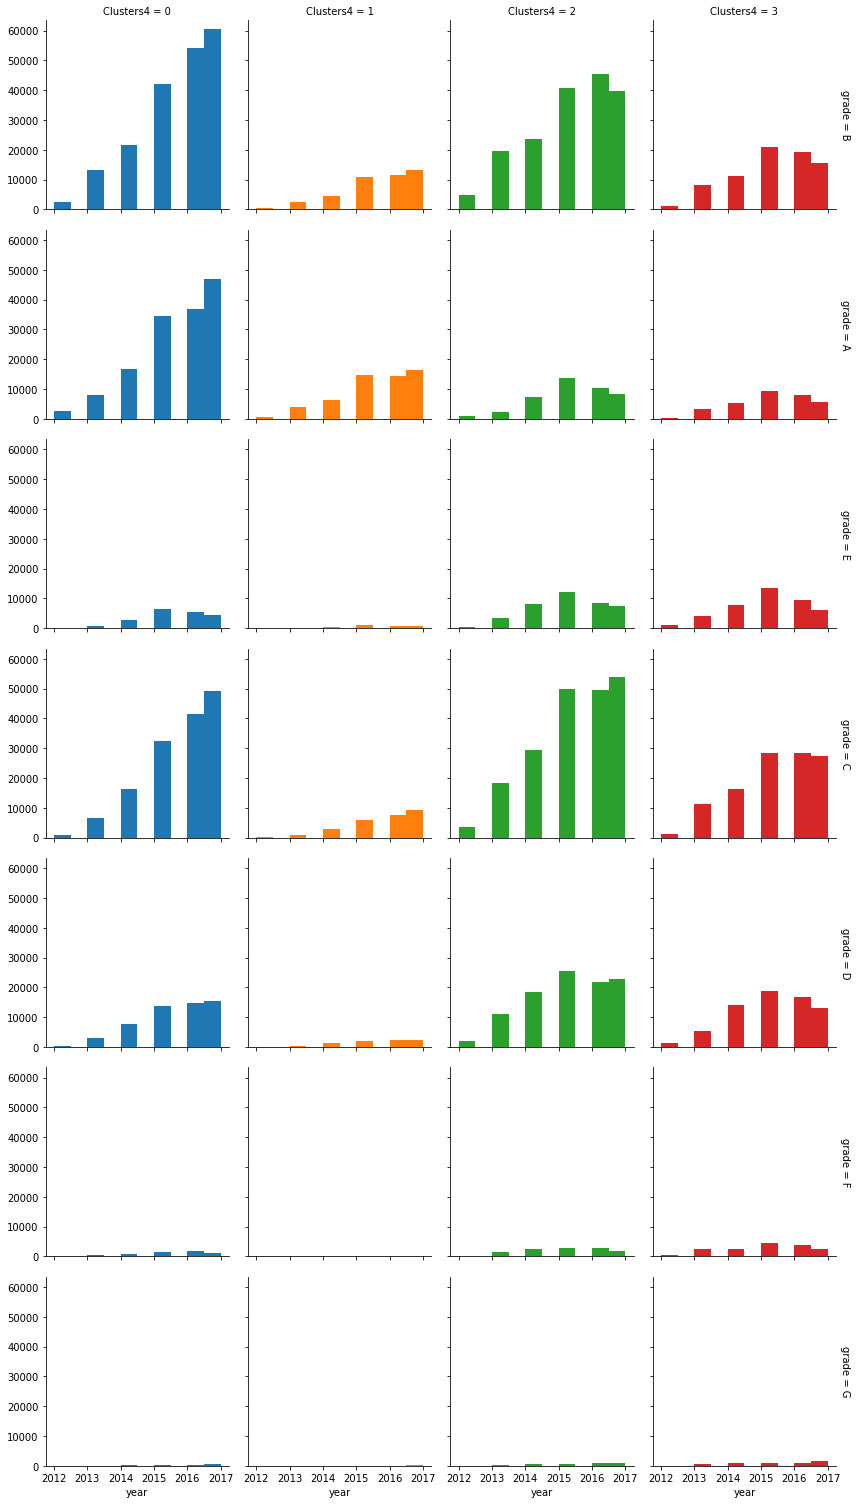

In [26]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "grade", col="Clusters4", margin_titles=True, hue="Clusters4")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

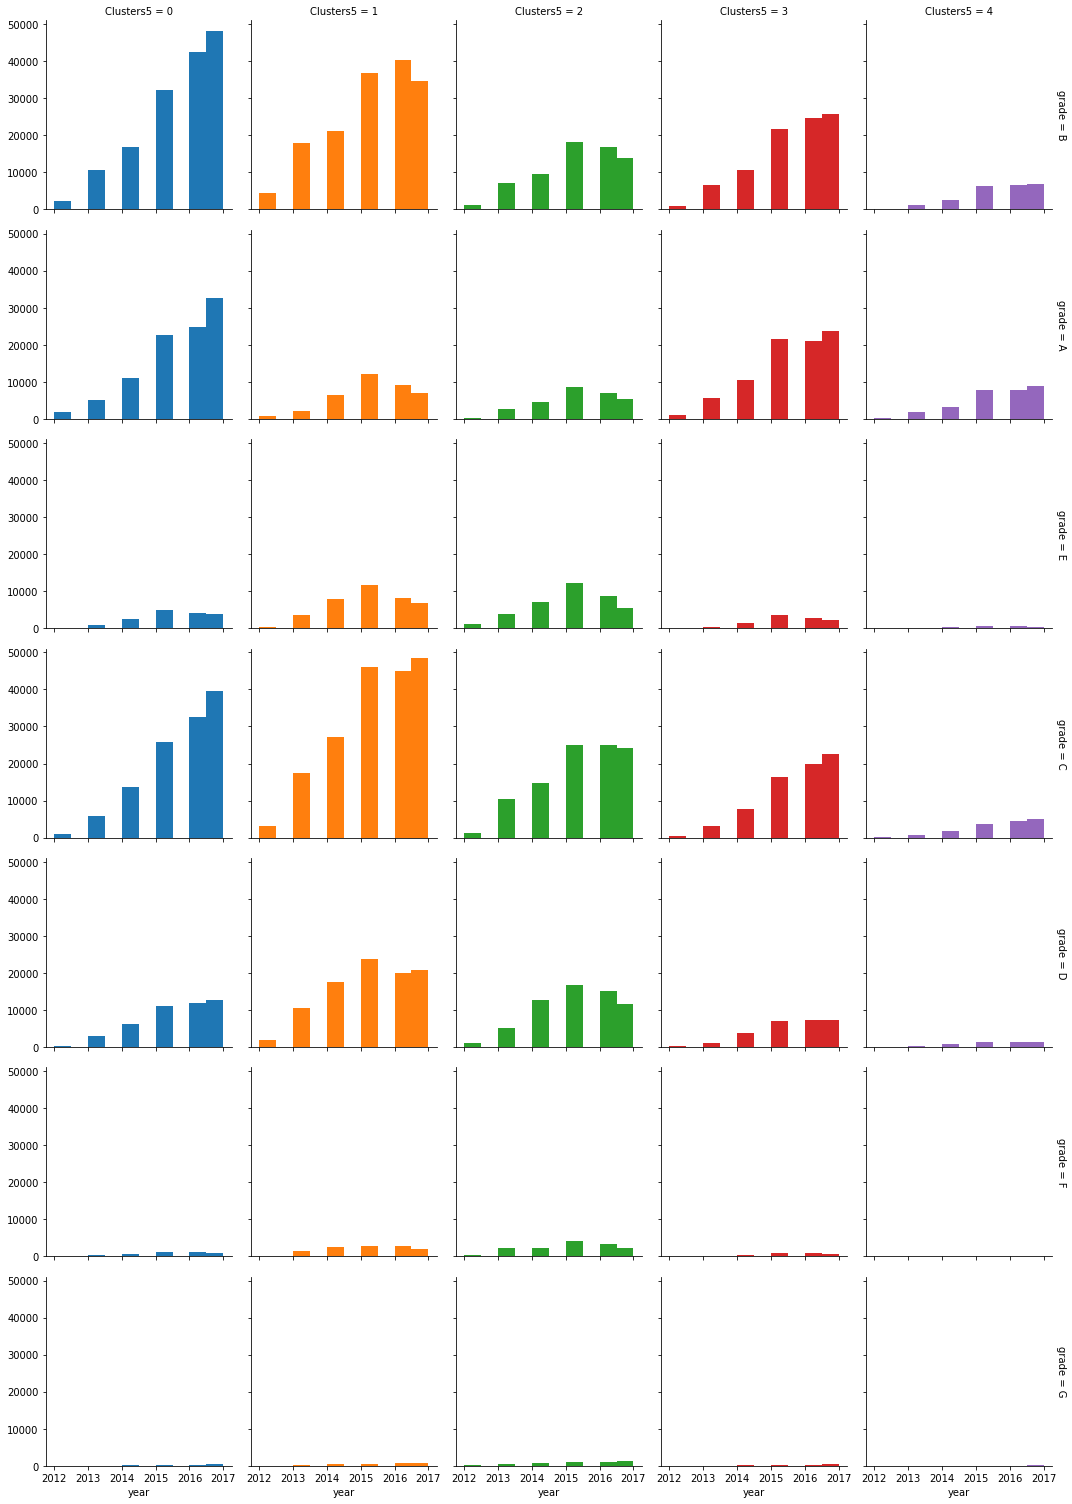

In [27]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "grade", col="Clusters5", margin_titles=True, hue="Clusters5")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

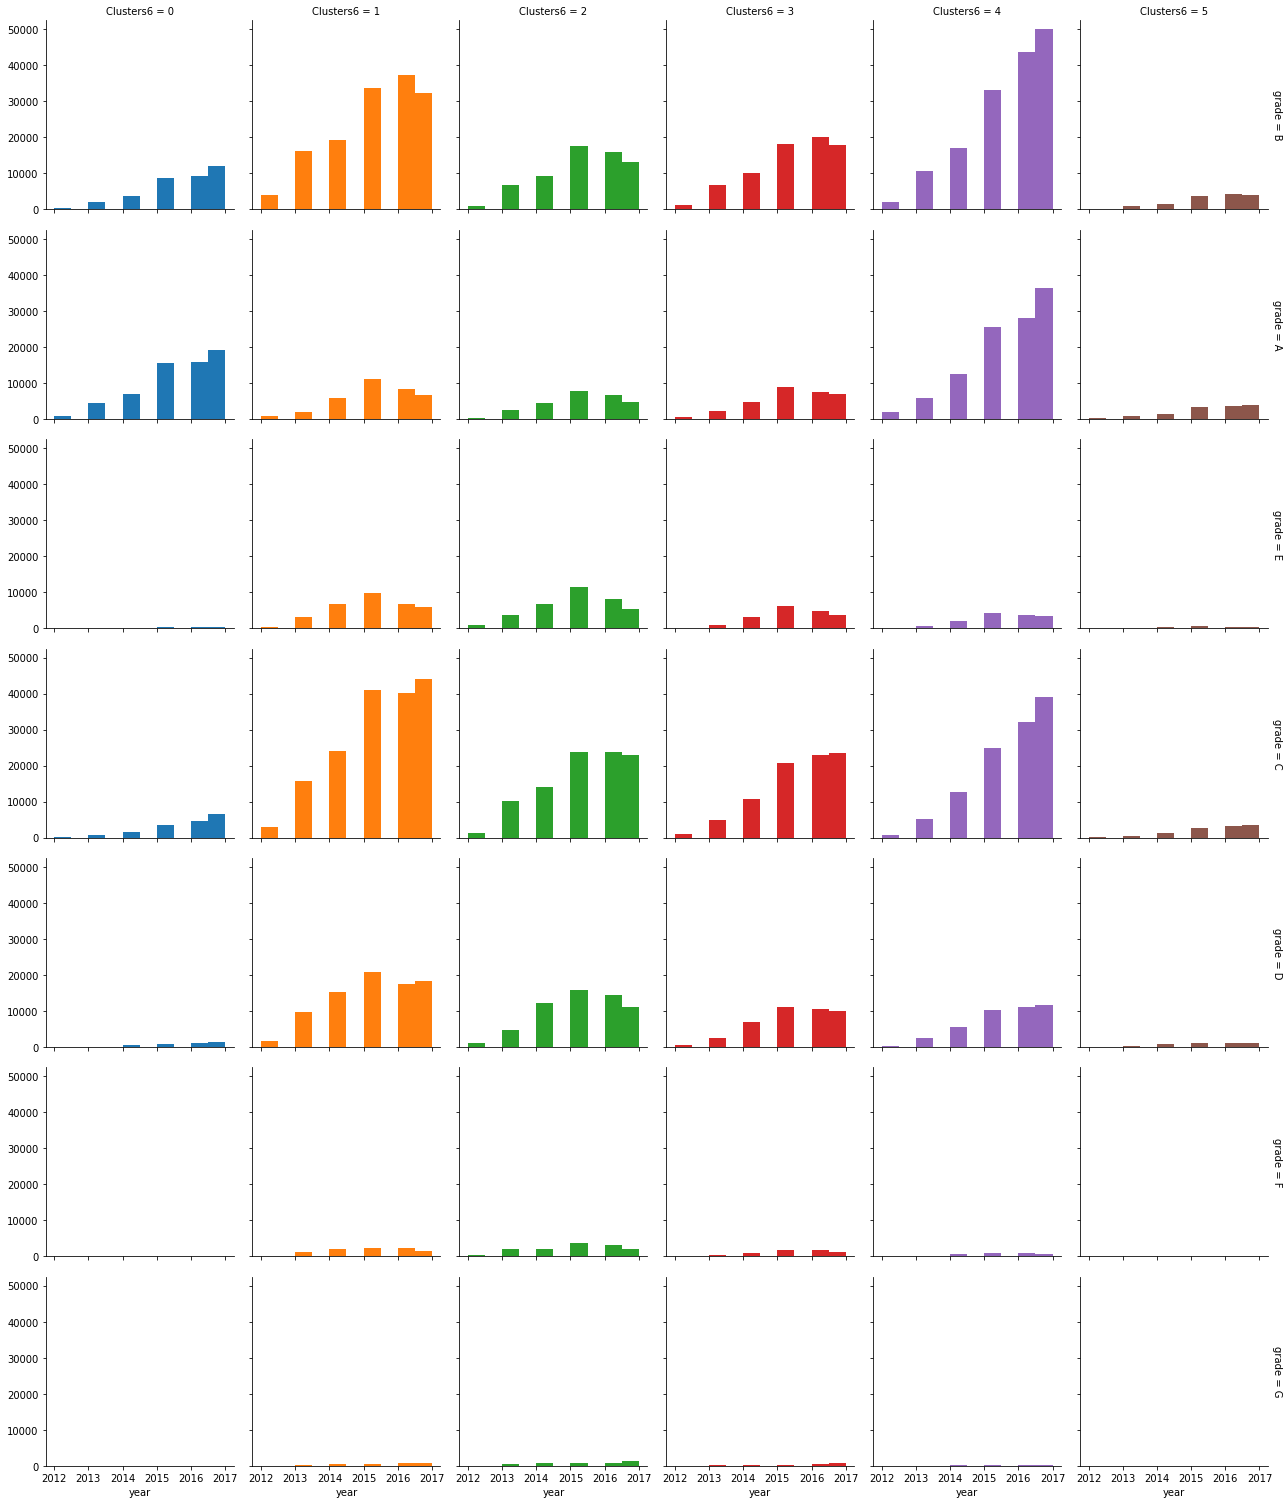

In [28]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "year", col="Clusters6", margin_titles=True, hue="Clusters6")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

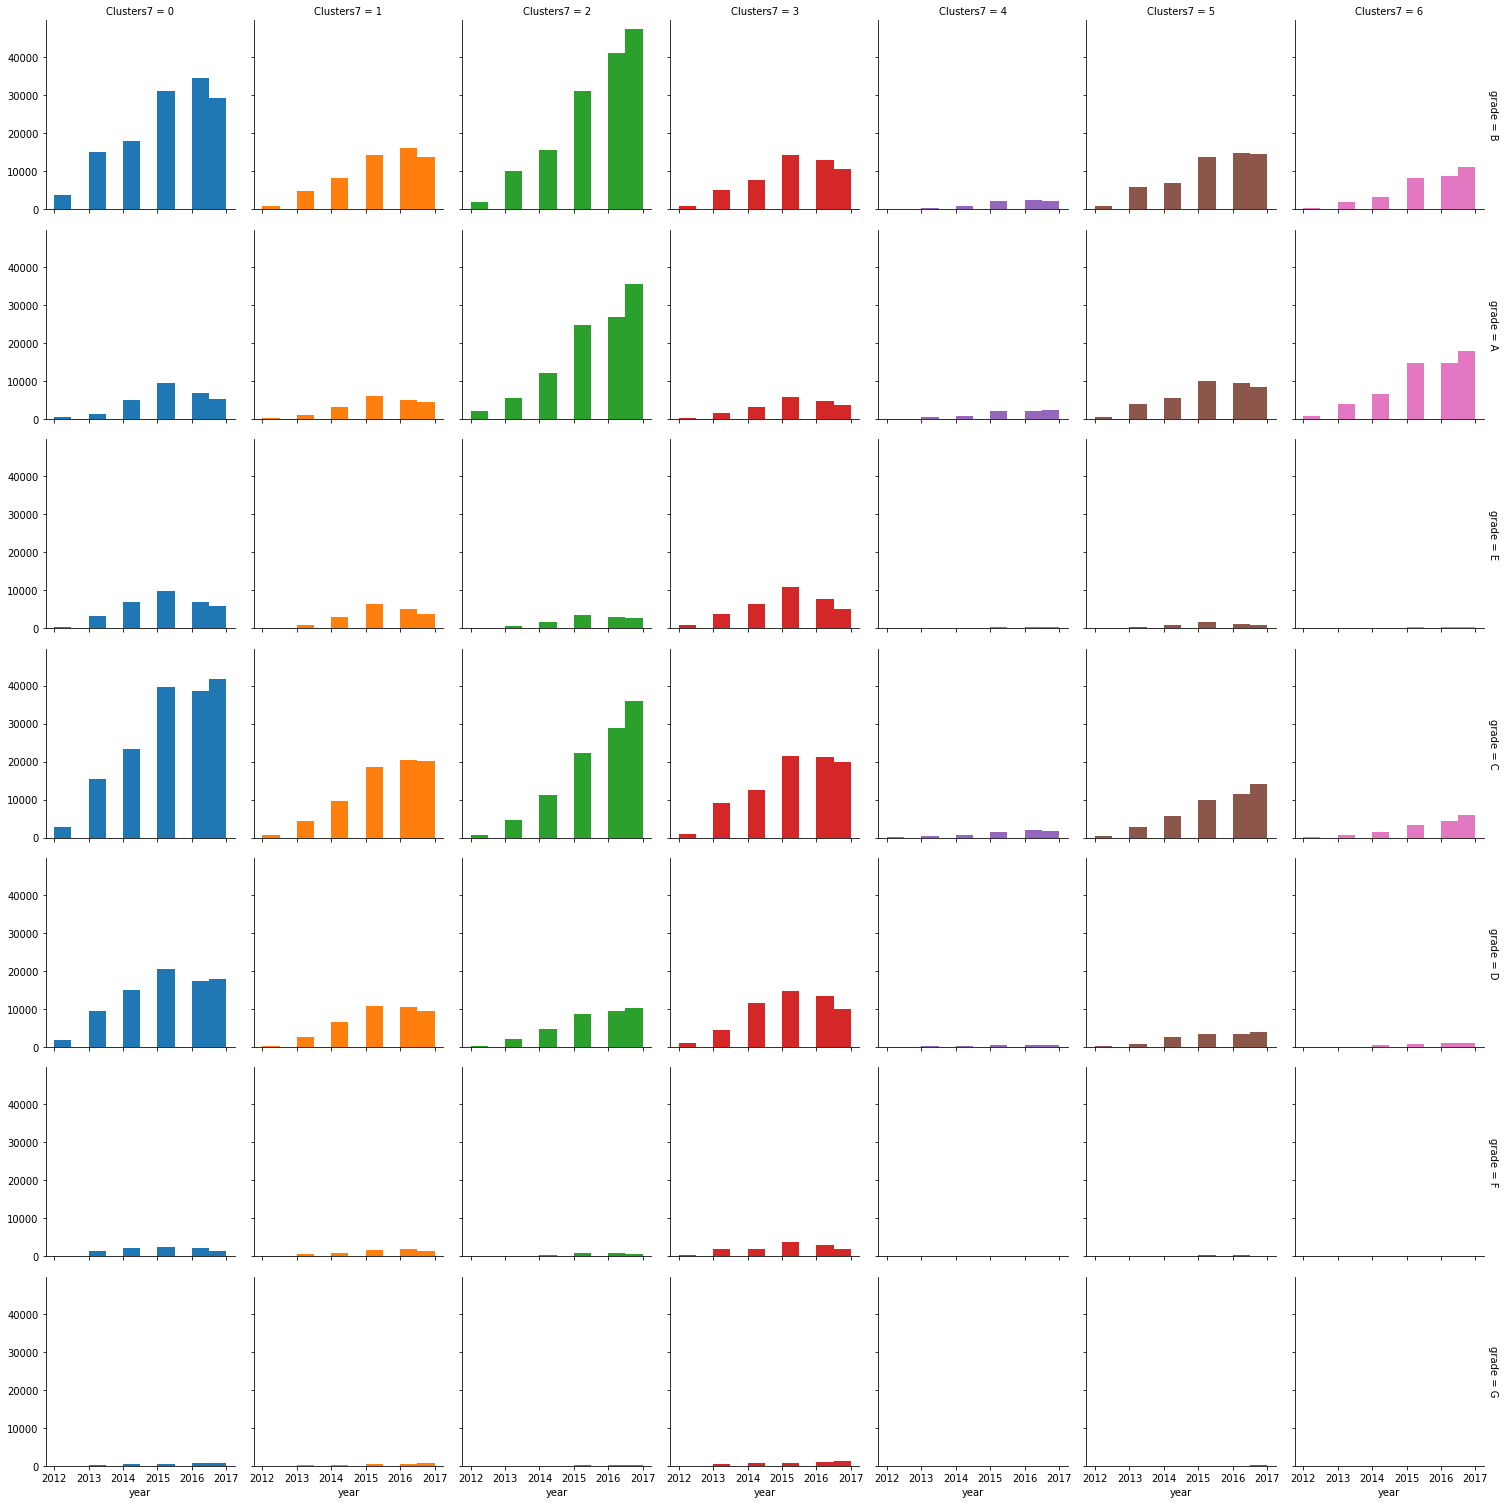

In [29]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "grade", col="Clusters7", margin_titles=True, hue="Clusters7")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

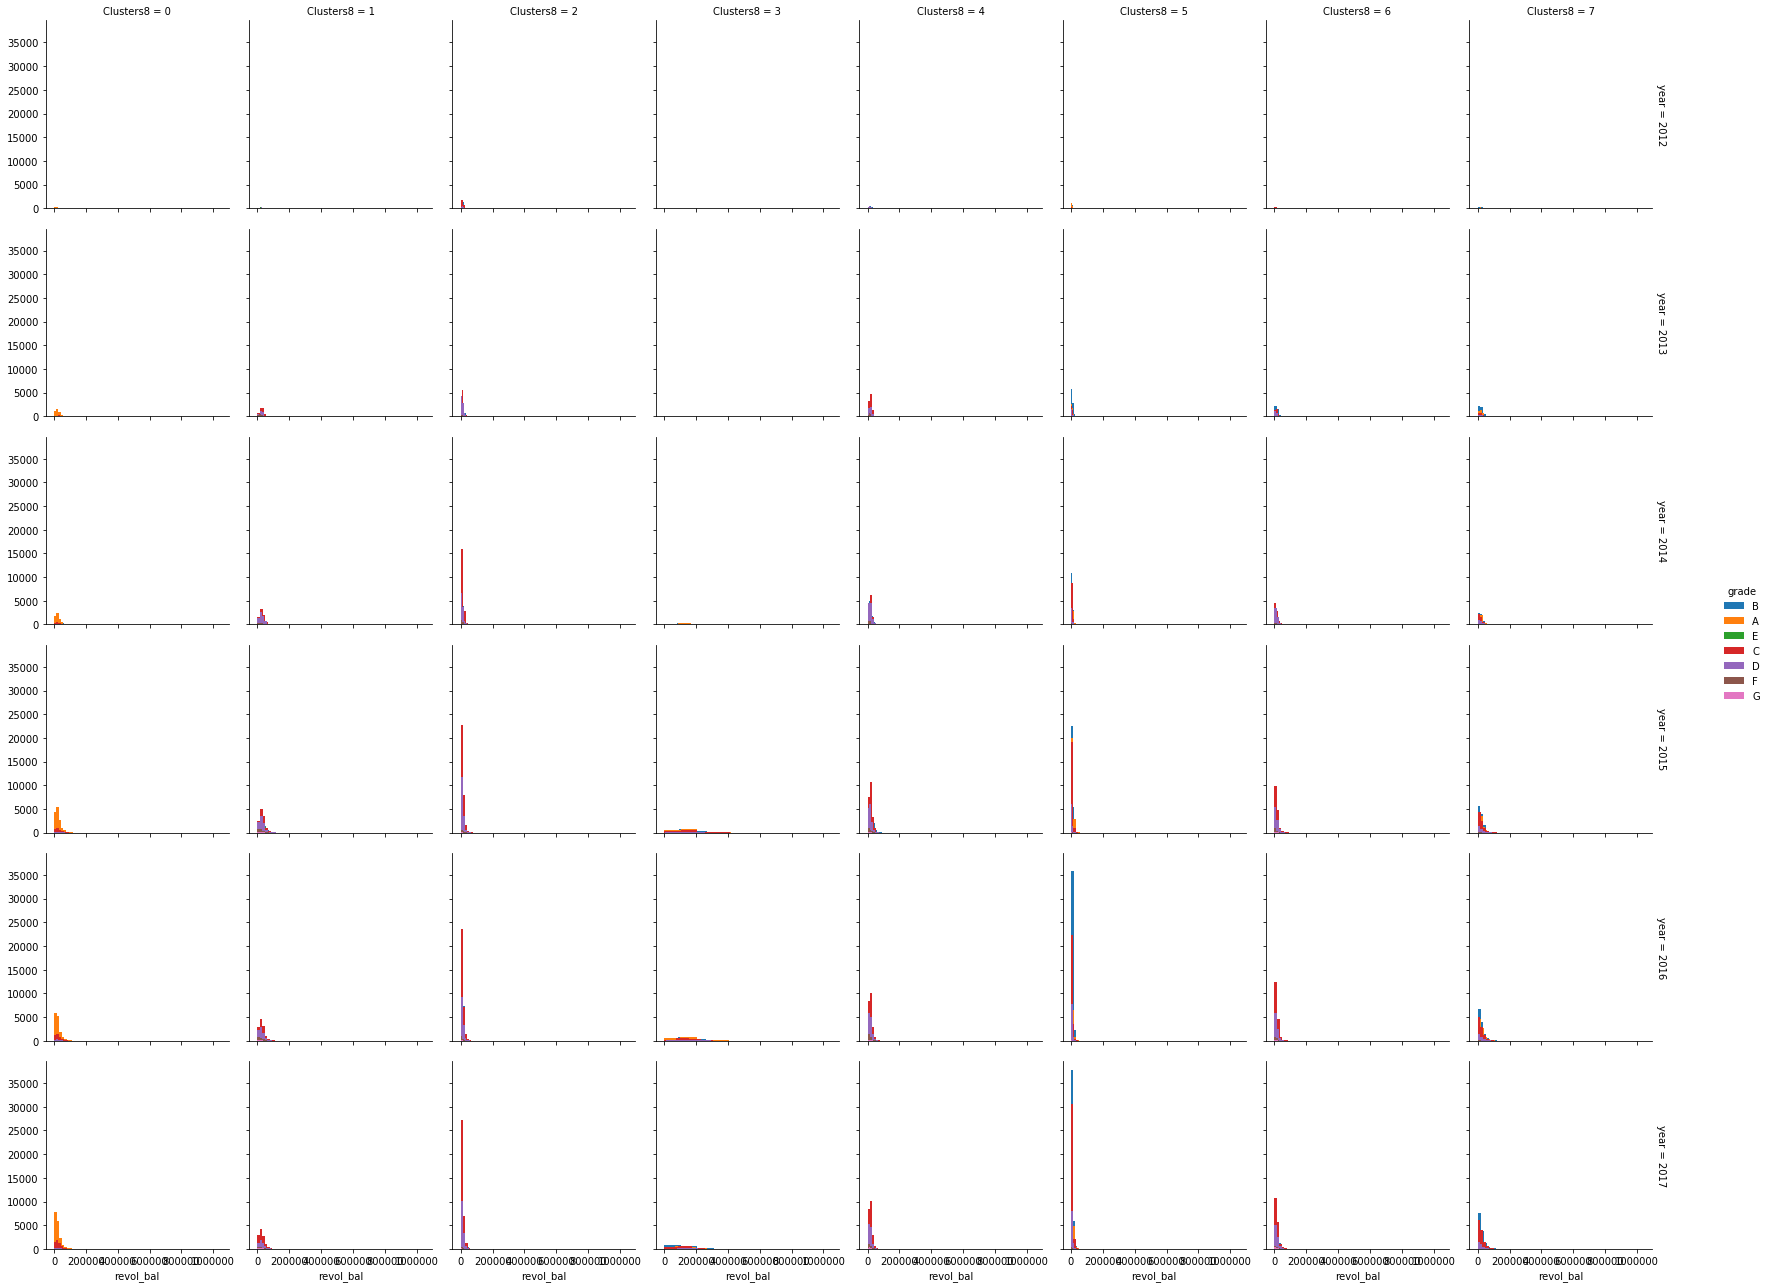

In [51]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "year", col="Clusters8", margin_titles=True, hue="grade")
# input facet variable in top
cplot.map(plt.hist, "revol_bal").add_legend() # input variable you want to see down here

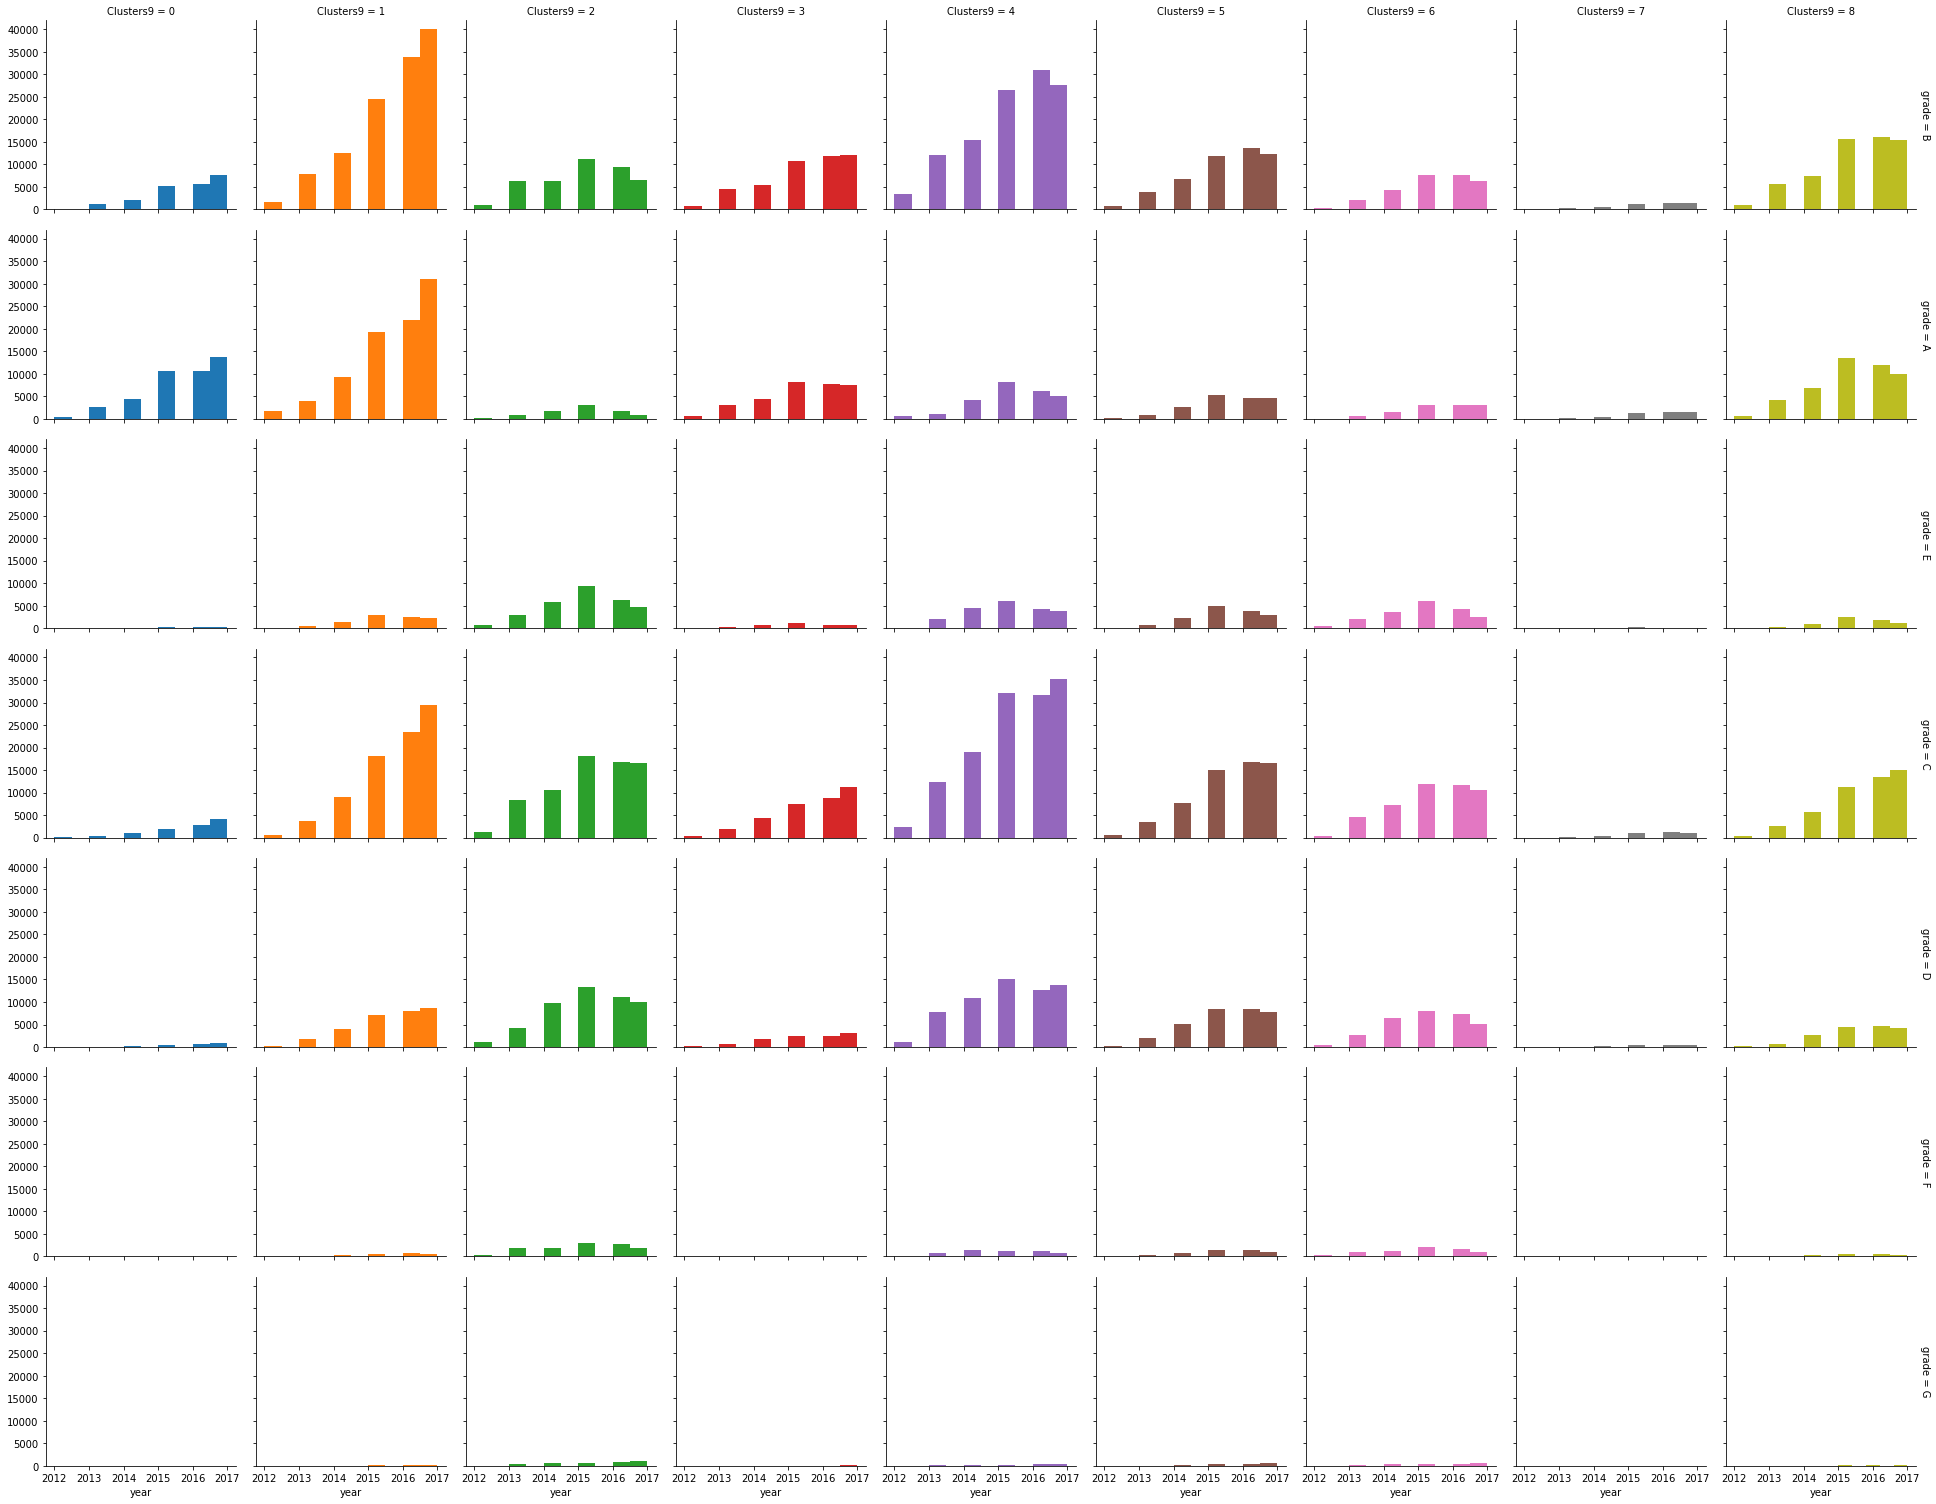

In [31]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "grade", col="Clusters9", margin_titles=True, hue="Clusters9")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

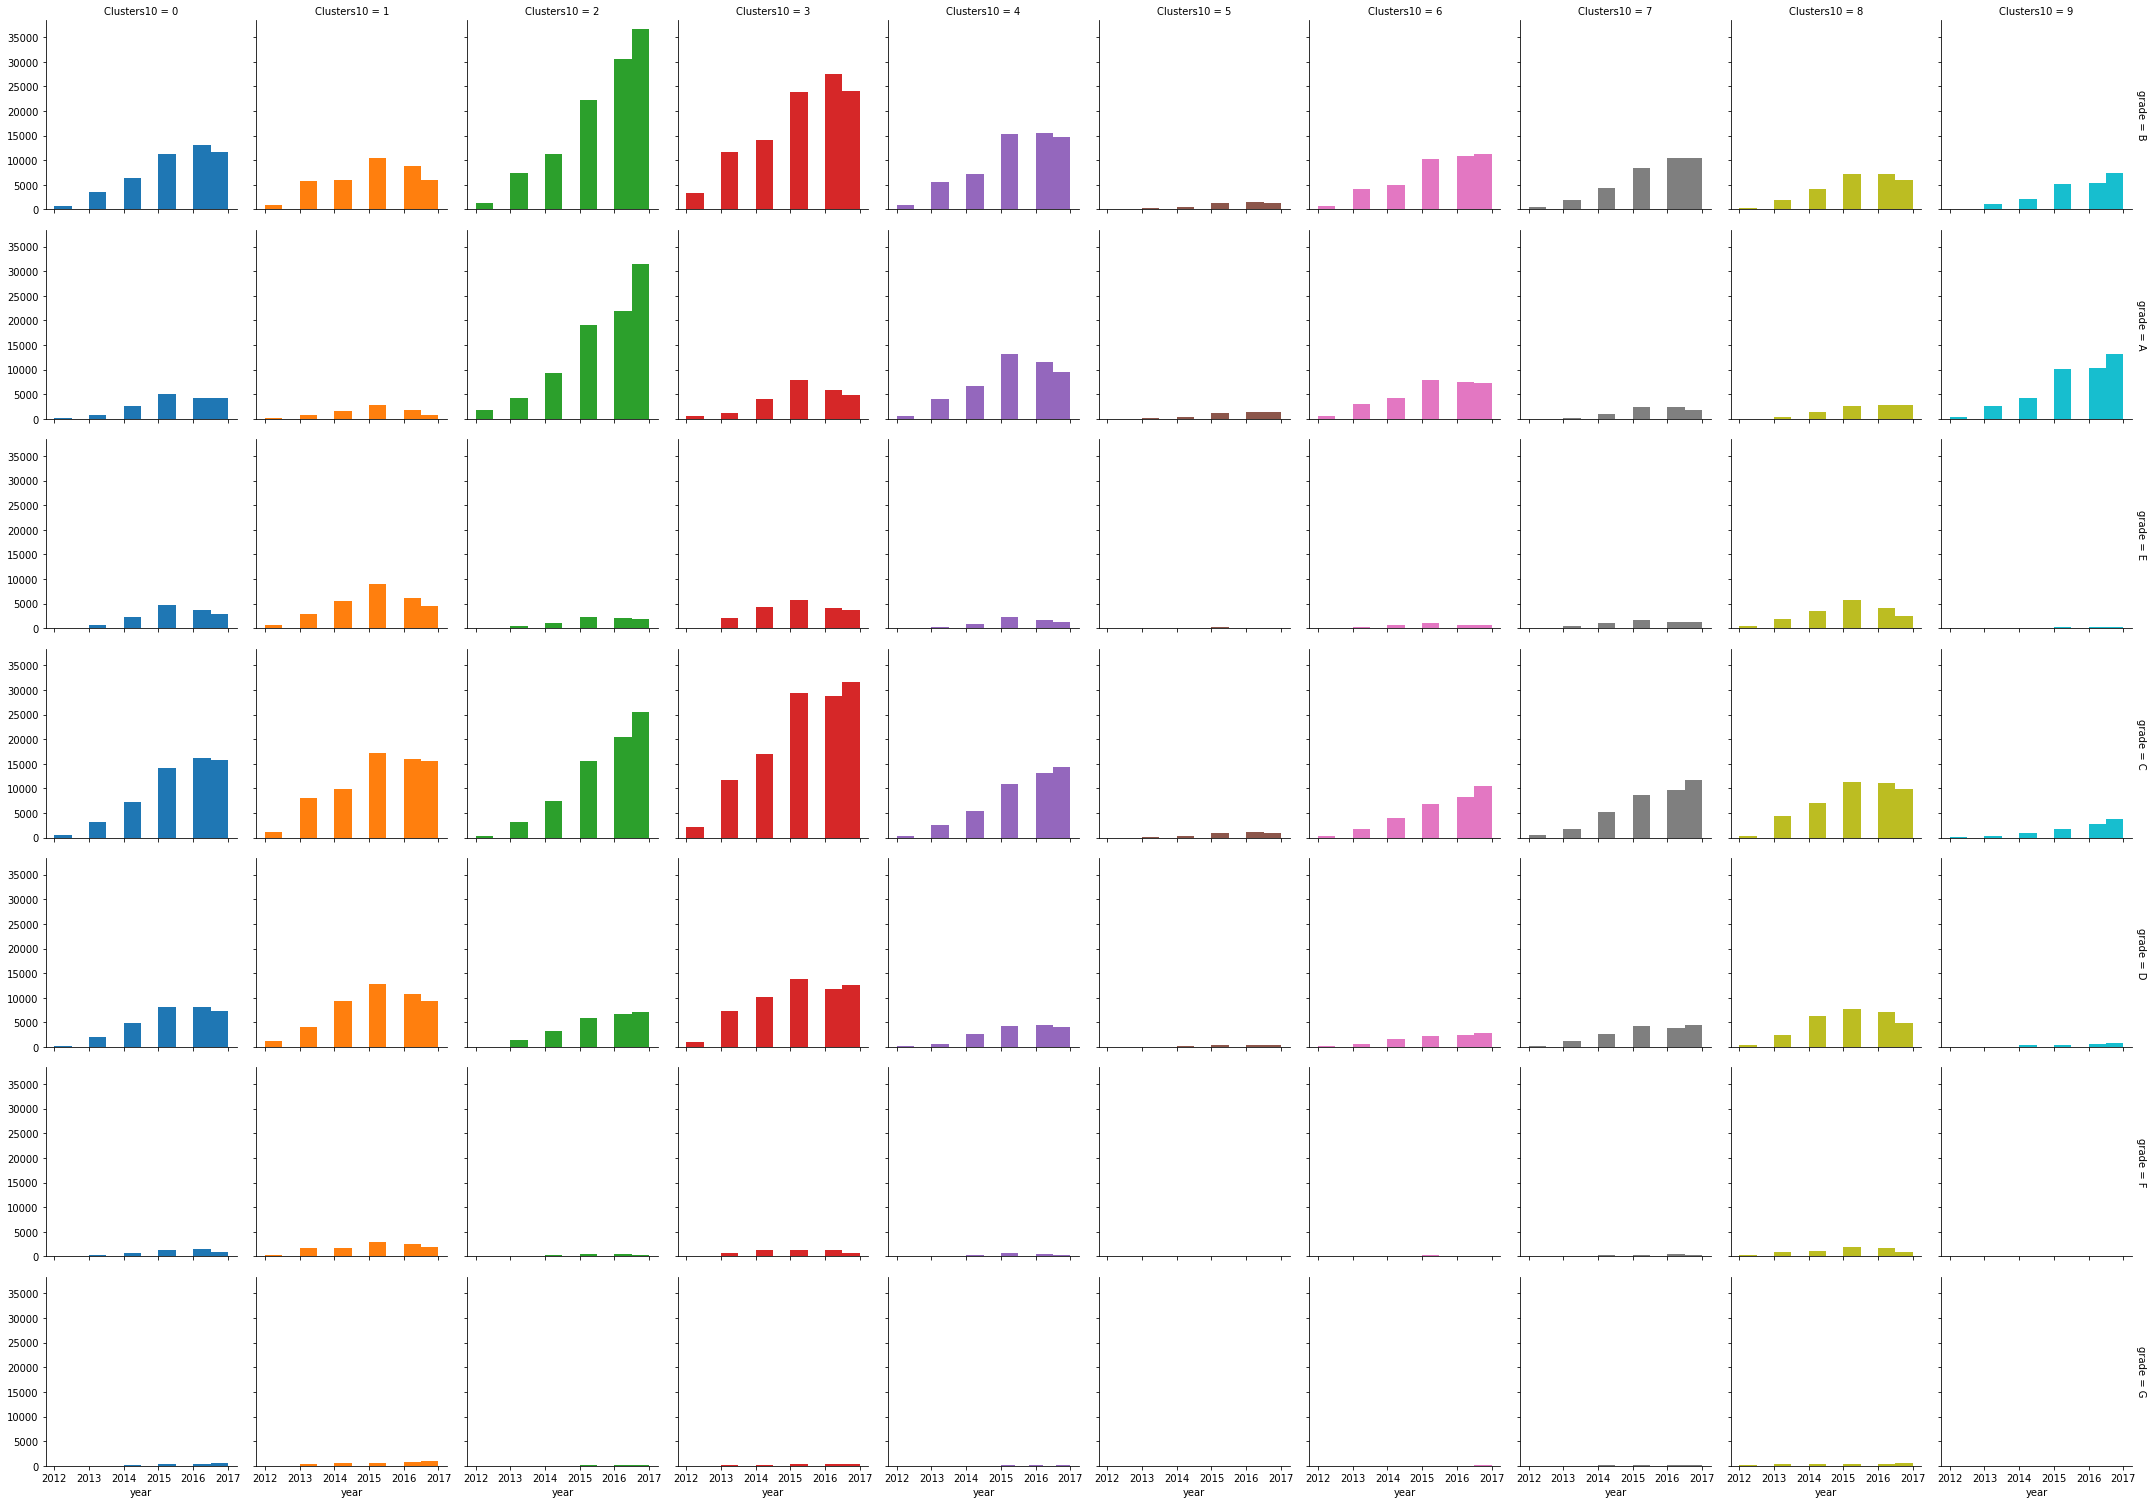

In [32]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "grade", col="Clusters10", margin_titles=True, hue="Clusters10")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

In [ ]:
# visualizing clusters

cplot = sns.FacetGrid(clusterlend, row = "grade", col="Clusters4", margin_titles=True, hue="Clusters4")
# input facet variable in top
cplot.map(plt.hist, "year") # input variable you want to see down here

In [55]:
lend1214 = clusterlend[(clusterlend["year"]==2012) | (clusterlend["year"]==2013) | (clusterlend["year"]==2014)]
# lend1214.head

lend1517 = clusterlend[(clusterlend["year"]==2015) | (clusterlend["year"]==2016) | (clusterlend["year"]==2017)]
# lend1517.head

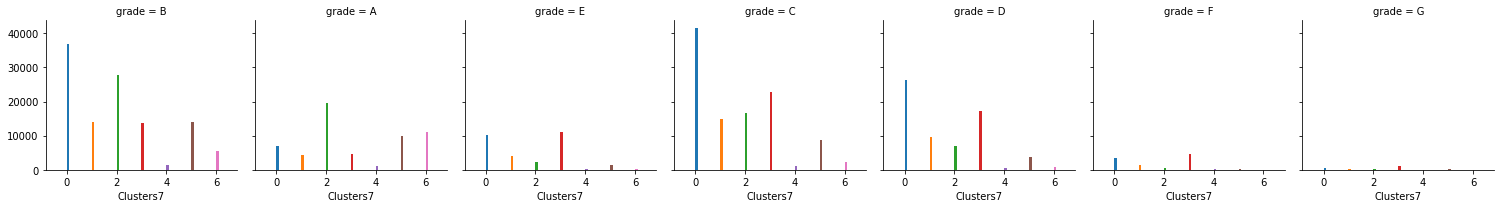

In [76]:
earlyplot = sns.FacetGrid(lend1214, col = "Clusters7", margin_titles = True, hue = "Clusters7")
earlyplot.map(plt.hist, "int_rate")

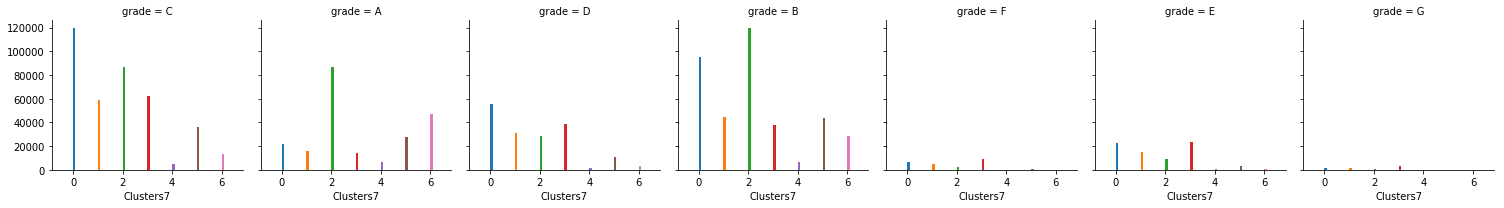

In [84]:
lateplot = sns.FacetGrid(lend1517, col = "grade", margin_titles = True, hue = "Clusters7")
lateplot.map(plt.hist, "Clusters7")

In [75]:
diff1214 = lend1214.groupby("Clusters7").describe().T
diff1214.to_csv("diff1214.csv")

diff1517 = lend1517.groupby("Clusters7").describe().T
diff1517.to_csv("diff1517.csv")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


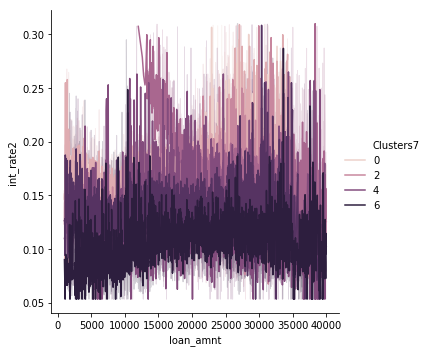

In [91]:
clusterlend['int_rate2'] = clusterlend['int_rate'].str.strip('%').astype('float') / 100
interest = sns.relplot(x = "loan_amnt", y = "int_rate2",
                     data = clusterlend, kind = "line", 
                     hue = "Clusters7")

# Cluster Notes


## 4 Clusters

Clusters 1 and 3 seem to have larger loan amounts to be asked for. Also paid in larger installments, and tended to have larger incomes. Cluster 1 had the highest income by a good amount though, with Cluster 3 seeming to be the step between Clusters 0 and 2 and cluster 1.

Debt to income ratio was much lower for cluster 0 than other clusters.

Clusters 0 and 1 had more credit inquiries in the last 6 months than the other two clusters

Clusters 1 and 3 had fewer months since last delinquent payment.

Cluster 1 had a good amount more open credit lines than other accounts. Cluster 2 had the fewest, then 0, then 3.

Cluster 1 had a much larger revolving balance than the other accounts.

Cluster 3 ended up paying more in interest than the other clusters.

Clusters 2 and 3 had less accounts open in the past 2 years than other clusters.

Cluster 0 had lowest current balance average and cluster 1 had highest.

Clusters 0 and 1 had far higher open to buy plans on revolving credit cards than other clusters.

Cluster 1 had a higher percentage of trades never delinquent than other clusters.

Cluster 0 and 1 had under half of their bank cards over 75% of the limit, while the other clusters had more.

Cluster 1 had a much greater credit limit, and higher credit balance.

Clusters 0 and 1 seem to be more concentrated in earlier years.

Cluster 0 had most observations, and a good amount of higher grades. 

Cluster 3 had worst grades, and cluster 1 had high grades with few observations. Cluster 2 had the biggest range
of grades.

## 5 Clusters

## 6 Clusters 

## 7 Clusters

## 8 Clusters

## 9 Clusters

## 10 Clusters